# STAT GR5243/GU4243 Fall 2023 Project 1: What made you happy today 

<div style="text-align: right">

### author: Clarence Jiang (yj2737)

</div>





<div style="text-align: left">
    <img src="../figs/wordcloud.png" alt="wordcloud">
</div>


This report explores on what makes people happy everyday.
The whole dataset: HappyDB is a corpus of 100,000 crowd-sourced happy moments. The external link of this dataset is [here](https://megagon.ai/happydb-a-happiness-database-of-100000-happy-moments/); it also contains a detailed paper explaining relevant research. This dataset collect happy moments that happened either within a 24-hour or a 3-month period for each participant. 

As for the happy-moment data, I will use the "cleaned_hm.csv" dataset since it cleans misspelled words and incomplete sentences. This dataset serves as my main dataset.

## Stage 1: Initial Exploration

<b>1.1 First I will perform some initial exploration to understand this dataset. I will read in the "cleaned_hm.csv" dataset and apply a "data_info_present" function to get an overview of the dataset. Throughout this project, I will consistently call functions from my "lib" folder for the seek of clean coding. </b>

The dataset looks clean and the "happy moment" descriptions are all quite complete. There is about half of the happy moments from 24h and the other half is recalled within 3 months, indicating that this is a balanced dataset.

There are some other datasets from the "Happy DB" author, yet I think the only useful one is the "demographics.csv". However, this analysis and data story are not related to the background information of the participants, so I will solely focus on the "cleaned_hm.csv".  
    

In [5]:
%%capture 
import pandas as pd
import sys
import os
sys.path.append("../lib")

from data_exploration import data_info_present, feature_reduction, bar_chart_visualization
from word_cloud import word_cloud
from sentiment_analysis import process_text, heatmap, extract_keywords

In [2]:
# read in dataset 
df = pd.read_csv("../data/cleaned_hm.csv")
df.head(10)

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise
3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding
4,27677,6227,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection
5,27678,45,24h,I meditated last night.,I meditated last night.,True,1,leisure,leisure
6,27679,195,24h,"I made a new recipe for peasant bread, and it ...","I made a new recipe for peasant bread, and it ...",True,1,NaN,achievement
7,27680,740,24h,I got gift from my elder brother which was rea...,I got gift from my elder brother which was rea...,True,1,NaN,affection
8,27681,3,24h,YESTERDAY MY MOMS BIRTHDAY SO I ENJOYED,YESTERDAY MY MOMS BIRTHDAY SO I ENJOYED,True,1,NaN,enjoy_the_moment
9,27682,4833,24h,Watching cupcake wars with my three teen children,Watching cupcake wars with my three teen children,True,1,NaN,affection


In [4]:
# This function is from ../lib/data_exploration.py. It should serve as a good overview of the dataset
data_info_present(df)

There are 100535 rows and 9 features
----------
Check what features are there and the data type
hmid                      int64
wid                       int64
reflection_period        object
original_hm              object
cleaned_hm               object
modified                   bool
num_sentence              int64
ground_truth_category    object
predicted_category       object
dtype: object
----------
Check how many uniques value for each column
hmid: 100535 unique values
wid: 10841 unique values
reflection_period: 2 unique values
original_hm: 96557 unique values
cleaned_hm: 96486 unique values
modified: 2 unique values
num_sentence: 47 unique values
ground_truth_category: 7 unique values
predicted_category: 7 unique values
----------
Check for missing values:
hmid                         0
wid                          0
reflection_period            0
original_hm                  0
cleaned_hm                   0
modified                     0
num_sentence                 0
ground_t

<b>
1.2 After exploring the overall structure and statistics of this dataset, I will further reduce features by the "feature_reduction" function in lib. </b>

- Drop the "original_hm". I assume a cleaned version is better (or at least not worse). 
- Drop the "modified" column since the "original_hm" column is dropped
- Remove "ground_truth_category". There is too much missing value; plus,"happiness" is an abstract concept, it is not realistic to have a correct and defined category for each situation, so "predicted_category" is sufficient for analysis. In this analysis, the "predicted_category" is more or less equivalent to ground truth. 

In [3]:
df_processed = feature_reduction(df)
df_processed.head()

,hmid,wid,reflection_period,cleaned_hm,num_sentence,predicted_category
0,27673,2053,24h,I went on a successful date with someone I fel...,1,affection
1,27674,2,24h,I was happy when my son got 90% marks in his e...,1,affection
2,27675,1936,24h,I went to the gym this morning and did yoga.,1,exercise
3,27676,206,24h,We had a serious talk with some friends of our...,2,bonding
4,27677,6227,24h,I went with grandchildren to butterfly display...,1,affection


<b>
1.3 Visualize the count of each category of the happy moments using the "bar_chart_visualization" function in lib </b>
    
I am mostly interested in what type of happiness is included in this dataset. Affection and achievement are the top 2 category counts, which are also significantly greater than the rest. This is reasonable since most of the time, people are happy about seeing things they like or improving themselves. These 2 scenarios are associated with long-term happiness, and people are likely to maintain a better impression on "long-term" positive changes, while other categories like "enjoy_the_moment", "leisure", or "nature" are likely to make you happy for a shorter time; you probably won't remember it for long after leaving the scenarios.

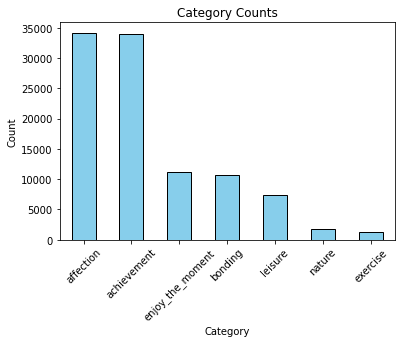

In [6]:
bar_chart_visualization(df_processed, "predicted_category")

## Stage 2: Happy Moment in 24h VS Happy Moment in 3m

<b>Happy moments shared by the participants could be divided into 2 categories according to the "reflection_period", either recalled from within 24h or 3 months. Are the happy words different between recent and old happy moments? </b>

There might be some differences. A hypothesis can be if people regard something happened about 3 month ago as their response, it is more likely to be a "happier" moment than something happened within 24h. However, this is not necessarily correct.

I will use my "word_cloud" method in lib, which draws word cloud after filtering out some distracting words, including the default stopwords used in the wordcloud package and extra non-informative words like "happy", "day", "went", "got", "able".  

In fact, from just the 2 word clouds, it is hard to tell if there is any source difference of happiness since both include overlapped words like "day", "friend", "work", "family", "new", etc. 

My conclusion would be the happy words is indifferent from the time perspective. However, the time difference is truly reflected in the wordcloud, the 24h wordcloud has more frequent time-related words like "morning", "yesterday", "last night". 

In [7]:
df_3m = df_processed[df_processed["reflection_period"]=="3m"]
df_24h = df_processed[df_processed["reflection_period"]=="24h"]

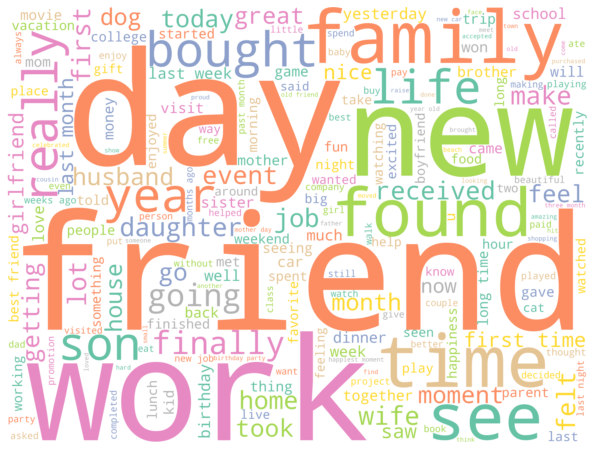

In [8]:
word_cloud(df_3m)

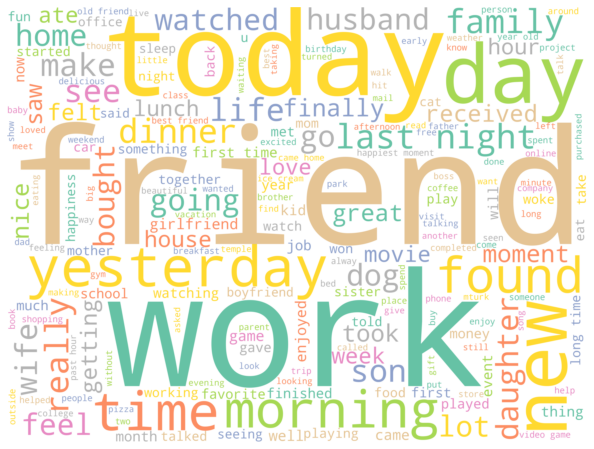

In [9]:
word_cloud(df_24h)

## Stage 3: Sentiment Analysis, which type of positive emotion? what are the happy words?

I want to follow the sentiment analysis that is similar to what Professor shared. However, since this is a happy moment dataset, I would assume most participant response will be positive and probably be classified as joy. Thus, instead of performing a thorough sentiment analysis, I will first mainly focus on classifying into 4 emotions: positive, joy, trust, anticipation.

The main technique is my "sentiment_analysis" file in the lib. I will tokenize each response sentence through the NLTK package and apply the NRCLex python library to extract the emotion scores for my target 4 emotions. 

Then my question is what are the "happy words" that lead a sentence to be a happy sentence. Each word in the tokenized list would be explored, and only those lead to the 4 target emotions will be recorded. 

To speed up the process, I stored this new generated csv file, which contains a few new columns, into the output folder. Heatmap is applied to view the correlation between the emotion scores. Joy scores are strongly related to positive and trust scores with 0.17 and 0.15, while anticipation might not be a "strict" happiness emotion. 

Building upon on this detailed analysis on the emotions happened behind happy moments, I am also interested in what are the exact words that contribute to happiness. This is different from the word cloud which just collects high frequent words; these new happy words are extracted through separate score extraction in the above process, which eventually becomes the "happy_words" column in the output csv file. 

The top 10 happy words are ['happy', 'time', 'good', 'friend', 'found', 'dinner', 'long', 'daughter', 'job', 'finally'], which sort of makes sense. "Time" is likely to occur in a sentence like "I have a good time...". "Friend", "dinner", "job" are self-explainable. "finally" and "found" are somewhat similar, representing participants discovered or achieved something that they haven't got.

In [2]:
# Load the intermediate csv output if it is already stored
if not os.path.exists("../output/hm_word_analzyed.csv"):
    df_word_analyzed = process_text(df_processed)
    df_word_analyzed.to_csv("../output/hm_word_analzyed.csv", index=False)
else: 
    df_word_analyzed = pd.read_csv("../output/hm_word_analzyed.csv")

In [3]:
df_word_analyzed

,hmid,wid,reflection_period,cleaned_hm,num_sentence,predicted_category,happy_words,joy_values,positive_values,trust_values,anticipation_values,emotion
0,27673,2053,24h,I went on a successful date with someone I fel...,1,affection,"['successful', 'sympathy']",0.000000,0.333333,0.000000,0.000000,positive_values
1,27674,2,24h,I was happy when my son got 90% marks in his e...,1,affection,['happy'],0.142857,0.142857,0.142857,0.142857,joy_values
2,27675,1936,24h,I went to the gym this morning and did yoga.,1,exercise,[],0.000000,0.000000,0.000000,0.000000,joy_values
3,27676,206,24h,We had a serious talk with some friends of our...,2,bonding,"['talk', 'good']",0.000000,0.181818,0.000000,0.000000,positive_values
4,27677,6227,24h,I went with grandchildren to butterfly display...,1,affection,['grandchildren'],0.250000,0.250000,0.250000,0.250000,joy_values
...,...,...,...,...,...,...,...,...,...,...,...,...
100530,128762,112,24h,My husband announced he is getting a decent bo...,1,affection,['decent'],0.000000,0.400000,0.000000,0.000000,positive_values
100531,128763,714,24h,Had a can of Pepsi to drink.,1,enjoy_the_moment,[],0.000000,0.000000,0.000000,0.000000,joy_values
100532,128764,3934,24h,Cuddling with my girlfriend last night.,1,affection,[],0.000000,0.000000,0.000000,0.000000,joy_values
100533,128765,1629,24h,I had a great meeting yesterday at work with m...,1,bonding,"['excited', 'working', 'efficient', 'team']",0.000000,0.300000,0.300000,0.000000,positive_values


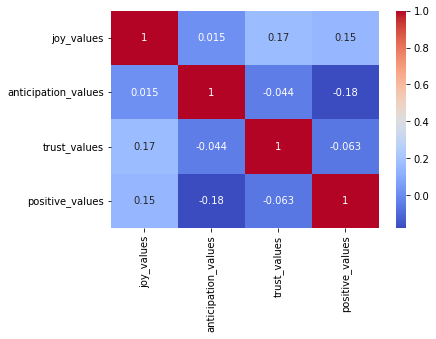

In [4]:
heatmap(df_word_analyzed)

In [4]:
top_10_happy_words = extract_keywords(df_word_analyzed)
print(top_10_happy_words)

['happy', 'time', 'good', 'friend', 'found', 'dinner', 'long', 'daughter', 'job', 'finally']


In [3]:
%%capture
! pip install nbconvert

In [5]:
! jupyter nbconvert --to html Clarence_Jiang_yj2737_proj1_blog.ipynb

[NbConvertApp] Converting notebook Clarence_Jiang_yj2737_proj1_blog.ipynb to html
[NbConvertApp] Writing 1274648 bytes to Clarence_Jiang_yj2737_proj1_blog.html
